In [1]:
%matplotlib inline
import pandas as pd
import geopandas as gpd
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt

In [2]:
shapefile_path = 'data/hydrobasins_lvl6/hybas_as_lev06_v1c.shp'
shapes = gpd.read_file(shapefile_path)

<Axes: >

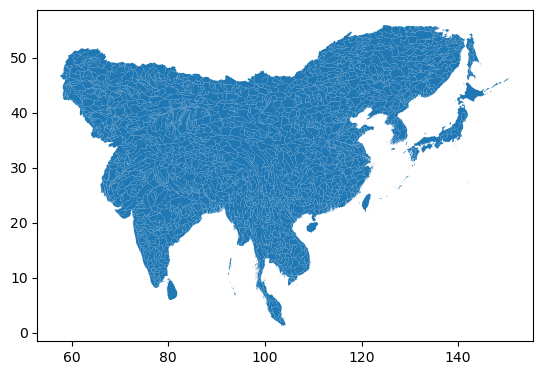

In [3]:
shapes.plot()

In [4]:
def get_precip_data_for_year(data_path, shapes):
    dataset = xr.open_dataset(data_path)
    
    sums = []
    
    for index, shape in shapes.iterrows():
        # Extract the geometry
        geom = shape.geometry

        # Select the data from the NetCDF file using the geometry
        # because \nearest\ method is used, even if there is no data
        # , it will calculate an average for data nearest to it
        # this makes it appear like there is data for areas where there is none (e.g., in Japan).
        # TODO : needs to label whether a shape is part of tibetan plateau or not
        data = dataset.sel(longitude=geom.centroid.x, latitude=geom.centroid.y, method='nearest')
        # data = dataset.sel(longitude=geom.centroid.x, latitude=geom.centroid.y, method=None)

        # Calculate the sum of the data
        # data_sum = data.sum()
        data_sum = data.sum()['tp'].values

        # Append the sum to the list
        sums.append(data_sum)
        
    return sums


In [5]:
years = np.arange(1984, 2022, 1)

final_data_set = pd.DataFrame()

for year in years:
    precip = get_precip_data_for_year(f'data/precip/{year}/data.nc', shapes=shapes)
    year_df = pd.DataFrame()
    year_df['precip'] = precip
    year_df['precip'] = year_df['precip'].astype(np.float64)
    year_df['year'] = year
    final_data_set = pd.concat([final_data_set, year_df])
    
final_data_set.head()

,precip,year
0,0.143784,1984
1,0.143784,1984
2,0.143784,1984
3,0.143784,1984
4,0.143784,1984


In [6]:
# Calculate the centroid of each shape and add a marker to the map
shapes['centroid_lon'] = shapes.apply(lambda row: row['geometry'].centroid.x, axis=1)
shapes['centroid_lat'] = shapes.apply(lambda row: row['geometry'].centroid.y, axis=1)


In [7]:
final_data_set = final_data_set.join(shapes).sort_values(by=['year', 'SORT'])
final_data_set = gpd.GeoDataFrame(final_data_set)

# bounding box from precip data
xmin = 45
xmax = 107
ymin = 24
ymax = 68

final_data_set = final_data_set.cx[xmin:xmax, ymin:ymax]


final_data_set.describe()
final_data_set.head()

,precip,year,HYBAS_ID,NEXT_DOWN,NEXT_SINK,MAIN_BAS,DIST_SINK,DIST_MAIN,SUB_AREA,UP_AREA,PFAF_ID,ENDO,COAST,ORDER,SORT,geometry,centroid_lon,centroid_lat
447,1.206194,1984,4060631960,4060629690,4060007850,4060007850,1356.8,1356.8,28426.8,51783.5,432270,0,0,2,448,"POLYGON ((108.86667 34.43750, 108.88138 34.438...",107.535213,34.395430
451,0.880377,1984,4060611660,4060631880,4060007850,4060007850,1527.2,1527.2,4221.8,4222.0,432262,0,0,4,452,"POLYGON ((106.58750 35.12083, 106.58807 35.127...",107.389148,35.047425
453,0.778580,1984,4060606120,4060611300,4060007850,4060007850,1552.4,1552.4,14418.8,14418.8,432264,0,0,4,454,"POLYGON ((107.41667 35.30000, 107.40174 35.300...",106.924689,35.716825
462,0.695534,1984,4060583100,4060606020,4060007850,4060007850,1649.8,1649.8,5961.4,10598.4,432267,0,0,3,463,"POLYGON ((107.67917 36.41667, 107.67981 36.410...",107.294046,36.419078
472,0.778336,1984,4060625230,4060631960,4060007850,4060007850,1753.2,1753.2,10713.7,10713.7,432290,0,0,2,473,"POLYGON ((106.29583 35.29167, 106.30662 35.291...",105.759122,35.404014


<Axes: >

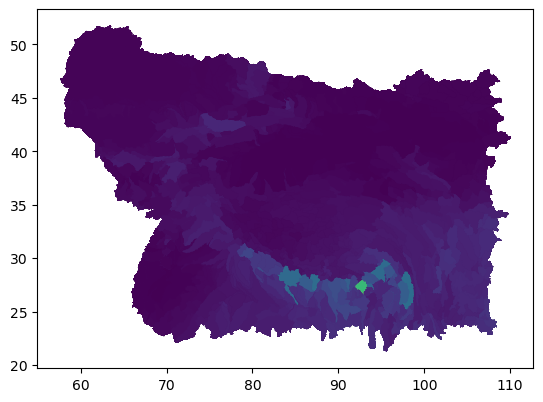

In [28]:
final_data_set.plot('precip')

In [9]:
final_data_set.HYBAS_ID.unique().shape

(1185,)

In [29]:
final_data_set.groupby('year').count()

,precip,HYBAS_ID,NEXT_DOWN,NEXT_SINK,MAIN_BAS,DIST_SINK,DIST_MAIN,SUB_AREA,UP_AREA,PFAF_ID,ENDO,COAST,ORDER,SORT,geometry,centroid_lon,centroid_lat
year,,,,,,,,,,,,,,,,,
1984,1185,1185,1185,1185,1185,1185,1185,1185,1185,1185,1185,1185,1185,1185,1185,1185,1185
1985,1185,1185,1185,1185,1185,1185,1185,1185,1185,1185,1185,1185,1185,1185,1185,1185,1185
1986,1185,1185,1185,1185,1185,1185,1185,1185,1185,1185,1185,1185,1185,1185,1185,1185,1185
1987,1185,1185,1185,1185,1185,1185,1185,1185,1185,1185,1185,1185,1185,1185,1185,1185,1185
1988,1185,1185,1185,1185,1185,1185,1185,1185,1185,1185,1185,1185,1185,1185,1185,1185,1185
1989,1185,1185,1185,1185,1185,1185,1185,1185,1185,1185,1185,1185,1185,1185,1185,1185,1185
1990,1185,1185,1185,1185,1185,1185,1185,1185,1185,1185,1185,1185,1185,1185,1185,1185,1185
1991,1185,1185,1185,1185,1185,1185,1185,1185,1185,1185,1185,1185,1185,1185,1185,1185,1185
1992,1185,1185,1185,1185,1185,1185,1185,1185,1185,1185,1185,1185,1185,1185,1185,1185,1185


In [10]:
# lake_df = pd.read_csv('data/gsw_reduced/lake_data.csv')
lake_df = pd.read_csv('/Users/johnaiken/repos/tblakes/data/lake_data.csv')
lake_df.head()

,Unnamed: 0,HYBAS_ID,lake_growth,lake_decline,all,year,region,growth_ratio,decline_ratio,water_balance,water_balance_m3
0,1825,4060640110,10587.839216,-3007.443137,1.984682e+07,2001,4,0.000533,0.000152,13595.282353,12.235754
1,2675,4060549810,239.000000,-185.000000,8.657417e+05,2001,5,0.000276,0.000214,424.000000,0.381600
2,2674,4060548960,1490.552941,-1235.090196,6.368726e+06,2001,5,0.000234,0.000194,2725.643137,2.453079
3,2673,4060534300,2852.054902,-3047.466667,1.923395e+07,2001,5,0.000148,0.000158,5899.521569,5.309569
4,2672,4060533250,63.000000,-20.000000,6.018019e+05,2001,5,0.000105,0.000033,83.000000,0.074700


In [11]:
lake_df.groupby([ 'year']).count()

,Unnamed: 0,HYBAS_ID,lake_growth,lake_decline,all,region,growth_ratio,decline_ratio,water_balance,water_balance_m3
year,,,,,,,,,,
2001,592,592,592,592,592,592,592,592,592,592
2002,810,810,810,810,810,810,810,810,810,810
2003,810,810,810,810,810,810,810,810,810,810
2004,810,810,810,810,810,810,810,810,810,810
2005,810,810,810,810,810,810,810,810,810,810
2006,810,810,810,810,810,810,810,810,810,810
2007,810,810,810,810,810,810,810,810,810,810
2008,810,810,810,810,810,810,810,810,810,810
2009,810,810,810,810,810,810,810,810,810,810


In [34]:
lake_df[lake_df.year==2001].HYBAS_ID.unique().shape

(477,)

In [35]:
lake_df[lake_df.year==2002].HYBAS_ID.unique().shape

(45,)

In [30]:
fds.dtypes

precip           float64
year               int64
HYBAS_ID           int64
NEXT_DOWN          int64
NEXT_SINK          int64
MAIN_BAS           int64
DIST_SINK        float64
DIST_MAIN        float64
SUB_AREA         float64
UP_AREA          float64
PFAF_ID            int64
ENDO               int64
COAST              int64
ORDER              int64
SORT               int64
geometry        geometry
centroid_lon     float64
centroid_lat     float64
dtype: object

In [31]:
lake_df.dtypes

Unnamed: 0            int64
HYBAS_ID              int64
lake_growth         float64
lake_decline        float64
all                 float64
year                  int64
region                int64
growth_ratio        float64
decline_ratio       float64
water_balance       float64
water_balance_m3    float64
dtype: object

In [12]:
year = 2015
fds = final_data_set[final_data_set.year==year].copy()
print('precip data shape', fds.HYBAS_ID.unique().shape)
ldf = lake_df[lake_df.year==year].copy()
print('lake data shape', ldf.HYBAS_ID.unique().shape)
fds.merge(lake_df[lake_df.year==year], on='HYBAS_ID').HYBAS_ID.unique().shape

precip data shape (1185,)
lake data shape (45,)


(45,)

In [13]:
df = final_data_set.merge(lake_df, on=['HYBAS_ID', 'year'])

<Axes: >

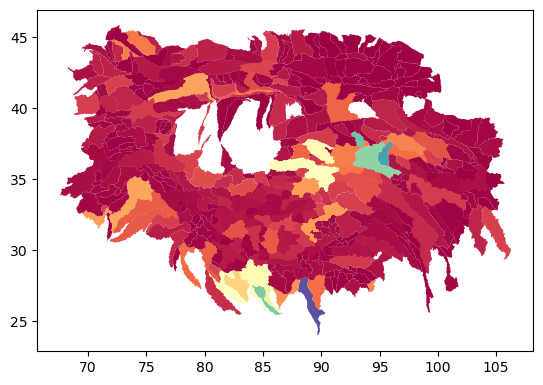

In [14]:
df.plot('water_balance_m3', cmap='Spectral')


(0.0, 1.0)

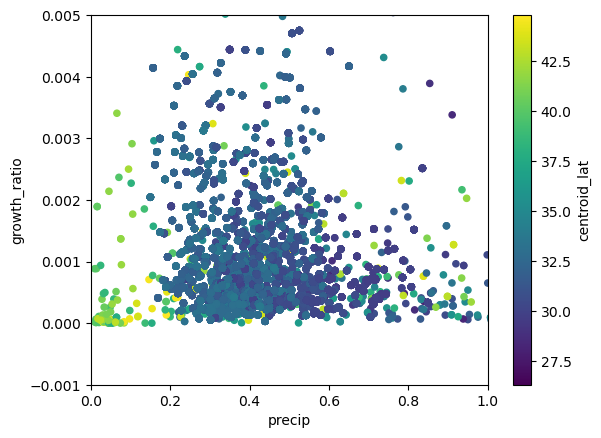

In [15]:
ax = df.plot.scatter('precip', 'growth_ratio', c='centroid_lat')
ax.set_ylim(-0.001, 0.005)
ax.set_xlim(0, 1)

In [16]:
df

,precip,year,HYBAS_ID,NEXT_DOWN,NEXT_SINK,MAIN_BAS,DIST_SINK,DIST_MAIN,SUB_AREA,UP_AREA,...,centroid_lat,Unnamed: 0,lake_growth,lake_decline,all,region,growth_ratio,decline_ratio,water_balance,water_balance_m3
0,0.628334,2001,4060625490,4060631960,4060007850,4060007850,1753.3,1753.3,12643.3,12643.3,...,34.883571,11115,412.000000,-390.000000,1.716384e+07,17,0.000024,0.000023,802.000000,0.721800
1,0.628334,2001,4060625490,4060631960,4060007850,4060007850,1753.3,1753.3,12643.3,12643.3,...,34.883571,3530,412.000000,-390.000000,1.716384e+07,13,0.000024,0.000023,802.000000,0.721800
2,0.378130,2001,4060534090,4060516030,4060007850,4060007850,3002.4,3002.4,19623.9,261233.7,...,37.202176,3508,9707.756863,-6844.419608,2.743681e+07,13,0.000354,0.000249,16552.176471,14.896959
3,0.332055,2001,4060563950,4060534090,4060007850,4060007850,3277.0,3277.0,14968.8,232183.9,...,36.473564,3509,2078.000000,-2619.000000,2.073012e+07,13,0.000100,0.000126,4697.000000,4.227300
4,0.415063,2001,4060578830,4060563950,4060007850,4060007850,3462.8,3462.8,1244.3,184333.3,...,36.019665,3510,770.749020,-418.992157,1.713215e+06,13,0.000450,0.000245,1189.741176,1.070767
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15167,0.536538,2019,4060056500,0,4060056500,4060056500,0.0,0.0,996.7,996.7,...,30.201230,9692,2127.611765,-334.011765,1.284206e+06,16,0.001657,0.000260,2461.623529,2.215461
15168,0.536538,2019,4060056500,0,4060056500,4060056500,0.0,0.0,996.7,996.7,...,30.201230,6331,2127.611765,-334.011765,1.284206e+06,9,0.001657,0.000260,2461.623529,2.215461
15169,0.536538,2019,4060056500,0,4060056500,4060056500,0.0,0.0,996.7,996.7,...,30.201230,11373,2127.611765,-334.011765,1.284206e+06,17,0.001657,0.000260,2461.623529,2.215461
15170,0.536538,2019,4060056500,0,4060056500,4060056500,0.0,0.0,996.7,996.7,...,30.201230,2940,2127.611765,-334.011765,1.284206e+06,5,0.001657,0.000260,2461.623529,2.215461


/var/folders/20/67zvnfrd4qn0q8029j2qbpqw0000gn/T/ipykernel_16578/862849438.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sums = df.groupby('year').sum()


<Axes: xlabel='year'>

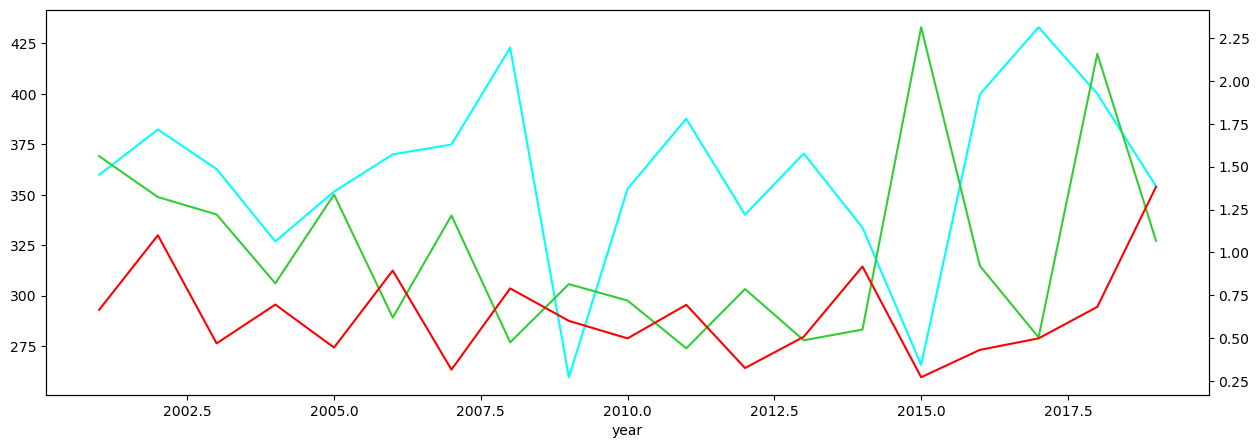

In [17]:
sums = df.groupby('year').sum()

# sums.cumsum().precip.plot()
fig, ax = plt.subplots(figsize=(15, 5))
sums.precip.plot(ax=ax, color='cyan')
ax2 = ax.twinx()
sums.growth_ratio.plot(ax=ax2, color='limegreen')
sums.decline_ratio.plot(ax=ax2, color='red')

In [18]:
df['all'].apply(lambda row: (row * 30 * 30)/1e3**2)

0        15447.455449
1        15447.455449
2        24693.129579
3        18657.108914
4         1541.893553
             ...     
15167     1155.784984
15168     1155.784984
15169     1155.784984
15170     1155.784984
15171     1155.784984
Name: all, Length: 15172, dtype: float64

In [19]:
df.columns

Index(['precip', 'year', 'HYBAS_ID', 'NEXT_DOWN', 'NEXT_SINK', 'MAIN_BAS',
       'DIST_SINK', 'DIST_MAIN', 'SUB_AREA', 'UP_AREA', 'PFAF_ID', 'ENDO',
       'COAST', 'ORDER', 'SORT', 'geometry', 'centroid_lon', 'centroid_lat',
       'Unnamed: 0', 'lake_growth', 'lake_decline', 'all', 'region',
       'growth_ratio', 'decline_ratio', 'water_balance', 'water_balance_m3'],
      dtype='object')

<Axes: xlabel='SUB_AREA', ylabel='all'>

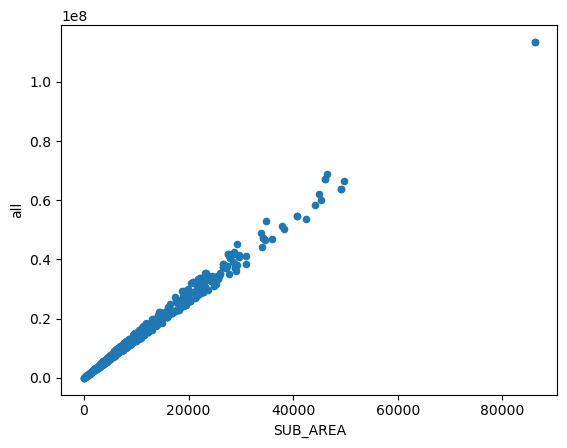

In [20]:
df[['SUB_AREA', 'all']].drop_duplicates().plot.scatter('SUB_AREA', 'all')

In [21]:
df.describe()

,precip,year,HYBAS_ID,NEXT_DOWN,NEXT_SINK,MAIN_BAS,DIST_SINK,DIST_MAIN,SUB_AREA,UP_AREA,...,centroid_lat,Unnamed: 0,lake_growth,lake_decline,all,region,growth_ratio,decline_ratio,water_balance,water_balance_m3
count,15172.000000,15172.000000,1.517200e+04,1.517200e+04,1.517200e+04,1.517200e+04,15172.000000,15172.000000,15172.000000,15172.000000,...,15172.000000,15172.000000,15172.000000,15172.000000,1.517200e+04,15172.000000,15172.000000,15172.000000,15172.000000,15172.000000
mean,0.451387,2010.129317,4.060249e+09,1.155701e+09,4.060046e+09,4.060046e+09,753.447785,755.968646,8783.335829,10108.829086,...,31.849885,7585.500000,15199.618132,-10019.553330,1.151810e+07,9.860862,0.001275,0.000804,25219.171462,22.697254
std,0.246827,5.408550,3.154592e+05,1.832371e+09,1.122923e+04,1.126602e+04,1242.419237,1243.643891,6569.981725,17397.486450,...,1.694766,4379.923477,23463.473447,15144.609321,8.592852e+06,5.605980,0.003838,0.000933,33905.022365,30.514520
min,0.009635,2001.000000,4.060050e+09,0.000000e+00,4.060008e+09,4.060008e+09,0.000000,0.000000,2.400000,192.900000,...,26.326715,0.000000,0.000000,-381149.219608,3.405686e+03,1.000000,0.000000,-0.000000,0.000000,0.000000
25%,0.330061,2005.000000,4.060052e+09,0.000000e+00,4.060034e+09,4.060034e+09,0.000000,0.000000,4875.100000,5405.900000,...,30.657746,3792.750000,3198.600000,-11528.000000,6.417233e+06,5.000000,0.000476,0.000339,7434.929412,6.691436
50%,0.419461,2010.000000,4.060053e+09,0.000000e+00,4.060051e+09,4.060051e+09,0.000000,0.000000,7250.500000,7390.300000,...,31.914118,7585.500000,7427.000000,-4940.000000,9.517855e+06,9.000000,0.000821,0.000596,14823.000000,13.340700
75%,0.505574,2015.000000,4.060690e+09,4.060689e+09,4.060053e+09,4.060053e+09,1703.700000,1773.825000,10814.200000,11870.900000,...,32.832684,11378.250000,17258.000000,-2245.553922,1.457213e+07,15.000000,0.001480,0.000962,29962.227451,26.966005
max,11.010061,2019.000000,4.060956e+09,4.060972e+09,4.060067e+09,4.060063e+09,5576.800000,5576.800000,86190.400000,767613.700000,...,44.775474,15171.000000,565769.439216,0.000000,1.134426e+08,19.000000,0.433466,0.041376,801693.905882,721.524515


In [22]:
df.year.unique()

array([2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
       2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019])

<Axes: >

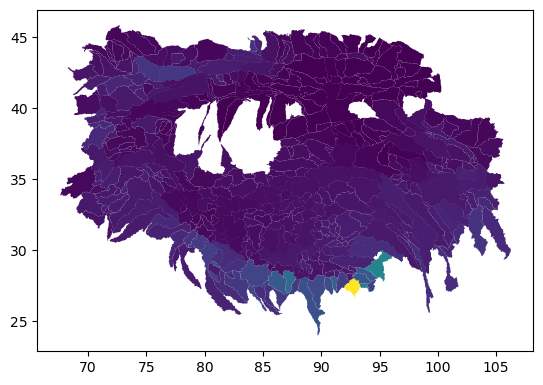

In [23]:
df[df.year==2001].plot('precip')

<Axes: >

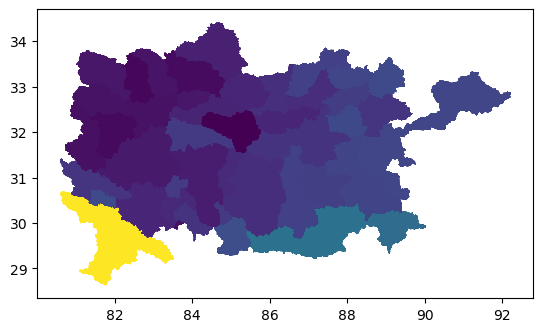

In [24]:
df[df.year==2002].plot('precip')

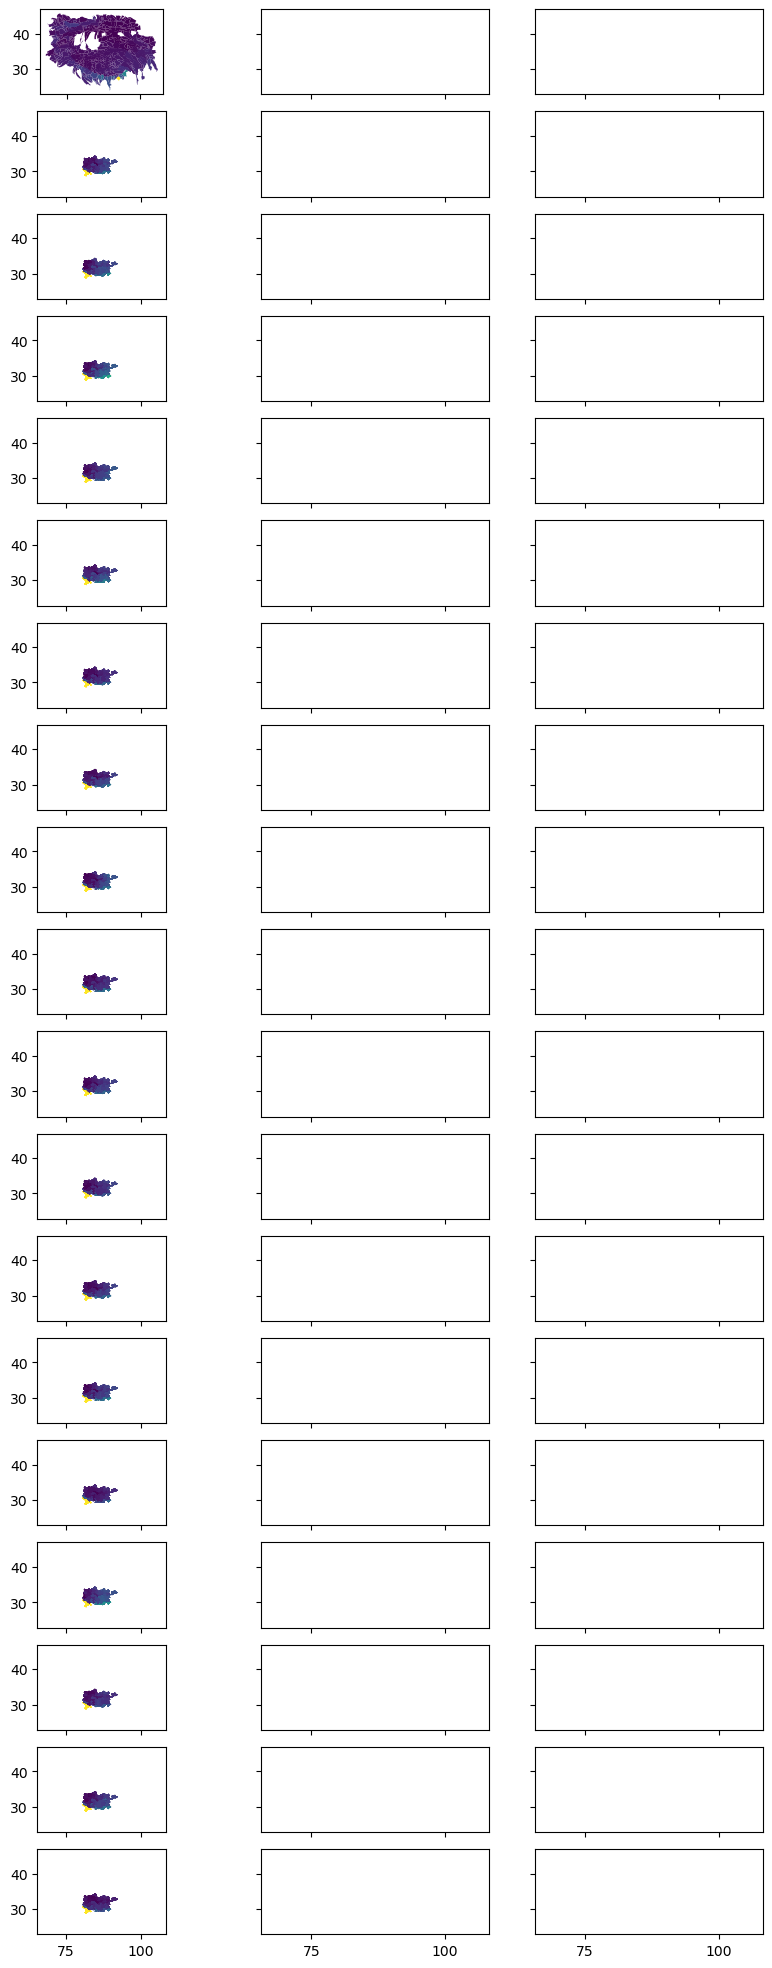

In [25]:
fig, axes = plt.subplots(19, 3, figsize=(10, 25), sharex=True, sharey=True)

for n, ax in enumerate(axes):
    year = 2001 + n
    df[df.year==year].plot('precip', ax=ax[0])

IndexError: index 16 is out of bounds for axis 0 with size 16

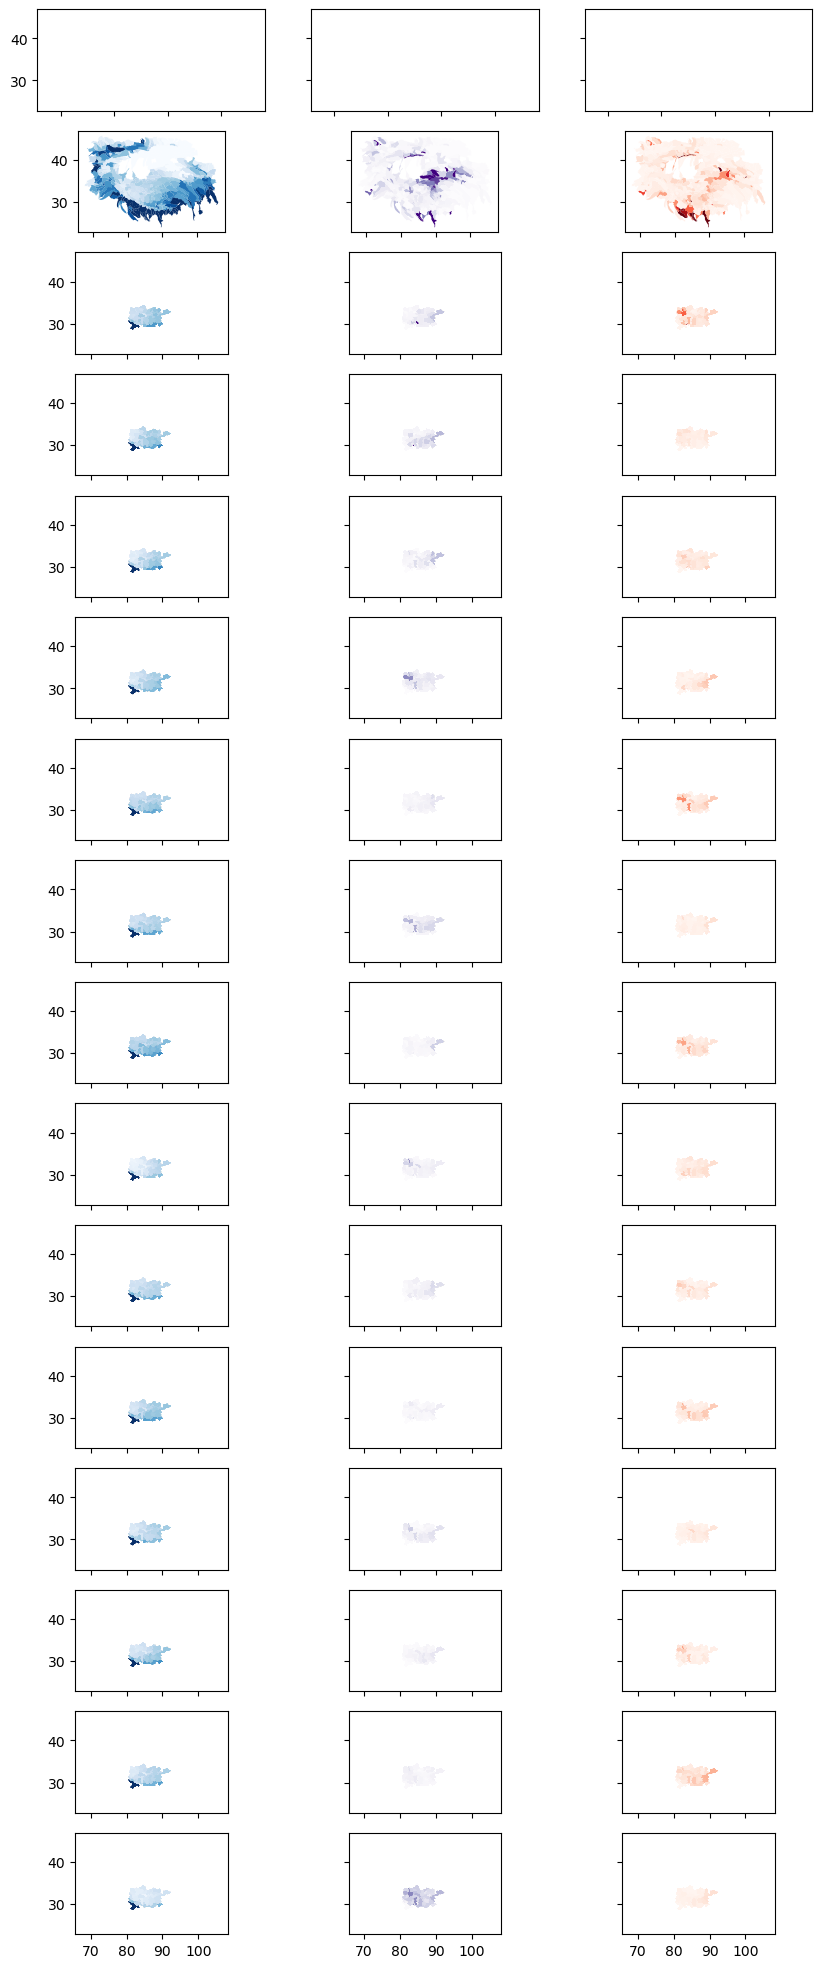

In [26]:
fig, ax = plt.subplots(16, 3, figsize=(10, 25), sharex=True, sharey=True)
# ax = ax.flatten()
for year in df.year.unique()[:-2]:
    # print(year, year-2001)
    df[df.year==year].plot('precip', ax=ax[year-2000][0], cmap='Blues', vmin=0.1, vmax=1.2)
    df[df.year==year].plot('growth_ratio', ax=ax[year-2000][1], cmap='Purples', vmin=1e-4, vmax=1e-2)
    df[df.year==year].plot('decline_ratio', ax=ax[year-2000][2], cmap='Reds', vmin=1e-4, vmax=1e-2)

fig.tight_layout()

In [ ]:
# ax.shape

In [ ]:
# year

In [ ]:
# df.year.unique()